In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os

In [2]:
os.chdir("/Users/sanyas/Desktop/projects")

In [3]:
df_1 = pd.read_csv("Norway_Stan.csv")
df_well = pd.read_csv("Norway.csv")
#Merge the 2 CSVs by API number
df_merged = df_well.merge(df_1, how = "left", on = "Name")
print(df_merged.head())

   Unnamed: 0_x    Name               Surface        X_x         Y_x       Z  \
0         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
1         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
2         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
3         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
4         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   

       MD  Geological age  TVT  TST  ... Unnamed: 34  Unnamed: 35  \
0  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
1  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
2  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
3  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
4  1382.0            4.21  NaN  NaN  ...         NaN          NaN   

   Unnamed: 36  Unnamed: 37  Unnamed: 0_y        X_y         Y_y  \
0          NaN          NaN         

In [4]:
df_merged.head()

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102


In [5]:
df_merged.Z = df_merged.Z - df_merged.Z.min()

In [17]:
D_df = df_merged.pivot_table("Normalized TVD","Formation","Name").fillna(0)
df_merged[["Normalized TVD", "Formation", "Name"]]

,Normalized TVD,Formation,Name
0,0.112166,-1.215791,10/4-1
1,0.112748,-1.176869,10/4-1
2,0.111701,-1.137946,10/4-1
3,0.110770,-1.099024,10/4-1
4,0.077844,-1.060102,10/4-1
...,...,...,...
484299,0.226400,-0.631959,9/8-1
484300,0.270458,-0.593036,9/8-1
484301,0.205379,-0.554114,9/8-1
484302,0.203828,-0.515192,9/8-1


In [18]:
D_df

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,0.112166,0.157966,0.435779,0.128297,0.217447,0.172590,0.0,0.843331,0.835474,0.835557,...,0.331680,0.323660,0.252339,0.243721,0.220059,0.211294,0.213543,0.215793,0.211102,0.211313
-1.176869,0.112748,0.157733,0.000000,0.128723,0.216943,0.000000,0.0,0.842827,0.835163,0.835285,...,0.331254,0.323854,0.252068,0.000000,0.220679,0.211216,0.213621,0.216025,0.000000,0.211623
-1.137946,0.111701,0.156337,0.000000,0.128103,0.000000,0.170652,0.0,0.000000,0.000000,0.000000,...,0.330647,0.321930,0.251253,0.244032,0.220020,0.210247,0.212147,0.214164,0.000000,0.000000
-1.099024,0.110770,0.154398,0.000000,0.123526,0.216943,0.159405,0.0,0.000000,0.834767,0.835557,...,0.326585,0.319968,0.247725,0.239882,0.218934,0.209393,0.209122,0.209781,0.000000,0.208986
-1.060102,0.077844,0.140979,0.416157,0.000000,0.000000,0.137648,0.0,0.837979,0.828458,0.829196,...,0.269985,0.267094,0.216248,0.182415,0.201714,0.190389,0.192910,0.182439,0.184111,0.199639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.871034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.909956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.948878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
R = D_df.values

In [20]:
from sklearn.preprocessing import binarize
A = binarize(R)

In [21]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE

In [22]:
U, Vt, M_list = runALS(R, A, 20, 5, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 0.1209374719966755
Error after solving for Item Matrix: 0.014374799035982384
0th iteration is complete...
Error after solving for User Matrix: 0.0019539728616882147
Error after solving for Item Matrix: 0.006661555510218984
1th iteration is complete...
Error after solving for User Matrix: 0.0013018361456027213
Error after solving for Item Matrix: 0.0043275032350524
2th iteration is complete...
Error after solving for User Matrix: 0.0010281231946810646
Error after solving for Item Matrix: 0.003119452423650441
3th iteration is complete...
Error after solving for User Matrix: 0.0008721272099024609
Error after solving for Item Matrix: 0.0024052910324914717
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 0.09676167294783376
Error after solving for Item Matrix: 0.022312813821259315
0th iteration is complete...
Error after solving for User Matrix: 0.002172769991495485
Error after solving 

Error after solving for User Matrix: 0.06238367332140008
Error after solving for Item Matrix: 0.09850466855505315
0th iteration is complete...
Error after solving for User Matrix: 0.004201874472248359
Error after solving for Item Matrix: 0.006993692113345502
1th iteration is complete...
Error after solving for User Matrix: 0.00041442580612717814
Error after solving for Item Matrix: 0.0015657175722656872
2th iteration is complete...
Error after solving for User Matrix: 0.00011967302404545309
Error after solving for Item Matrix: 0.0006011362886374608
3th iteration is complete...
Error after solving for User Matrix: 5.8443260262479126e-05
Error after solving for Item Matrix: 0.0003303451678527844
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 0.061495070887884674
Error after solving for Item Matrix: 0.09874727305618078
0th iteration is complete...
Error after solving for User Matrix: 0.003946581286741702
Error after solving for Item Matrix: 0.0056613

In [23]:
MAE_max = []
#get a list of the max errors from each value of n_factor
for i in M_list:
    MAE_max.append(max(i))
#The index of the minimum max error is the optimal n_factor value
print(MAE_max.index(min(MAE_max)))

0


In [24]:
recommendations = np.dot(U, Vt)
recsys = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys.head()

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,0.114511,0.160725,0.430457,0.128109,0.218626,0.162425,0.146468,0.852634,0.846752,0.845746,...,0.329429,0.322294,0.247880,0.235940,0.219632,0.211532,0.213687,0.213233,0.204005,0.210536
-1.176869,0.112542,0.159003,0.428798,0.128392,0.217955,0.161510,0.139678,0.838305,0.826842,0.831979,...,0.327094,0.320255,0.246329,0.235157,0.220017,0.211536,0.213638,0.213539,0.203084,0.210458
-1.137946,0.109449,0.155297,0.430013,0.126611,0.217521,0.158705,0.137585,0.833251,0.819269,0.827139,...,0.324733,0.318081,0.246168,0.234974,0.219671,0.210909,0.212704,0.212832,0.200744,0.210457
-1.099024,0.108224,0.154509,0.428082,0.125891,0.216309,0.158507,0.140190,0.839743,0.828009,0.833144,...,0.321946,0.315525,0.244389,0.231142,0.218319,0.208994,0.210986,0.210661,0.200017,0.209765
-1.060102,0.087518,0.140205,0.415012,0.112774,0.202264,0.144176,0.138689,0.812600,0.791903,0.804147,...,0.289648,0.283860,0.224542,0.195487,0.203631,0.191367,0.193829,0.189971,0.183686,0.198278


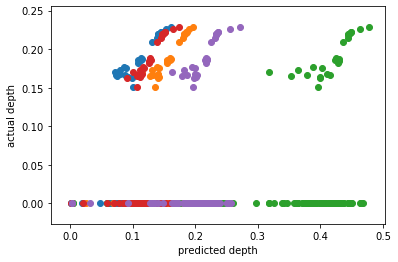

In [25]:
D_df_normalized = normalize((D_df.iloc[0:, 1].values).reshape(1, -1), norm='l2')
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df_normalized) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys.iloc[0:,i].max()))